In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('loan_sanction_test.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [5]:
df.describe(include=["number"]).T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.00,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.00,1025.0,2430.5,24000.0
LoanAmount,362.0,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,342.537396,65.156643,6.0,360.00,360.0,360.0,480.0
Credit_History,338.0,0.825444,0.380150,0.0,1.00,1.0,1.0,1.0


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [7]:
# Fill missing categorical values with mode
df.update(df[['Gender', 'Dependents', 'Self_Employed', 'Credit_History']].fillna(df.mode().iloc[0]))

In [8]:
# Fill missing numerical values with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

In [9]:
# Univariate Analysis

# Define numeric columns
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

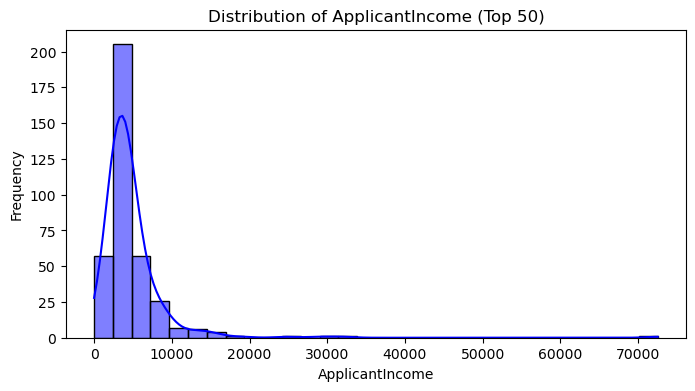

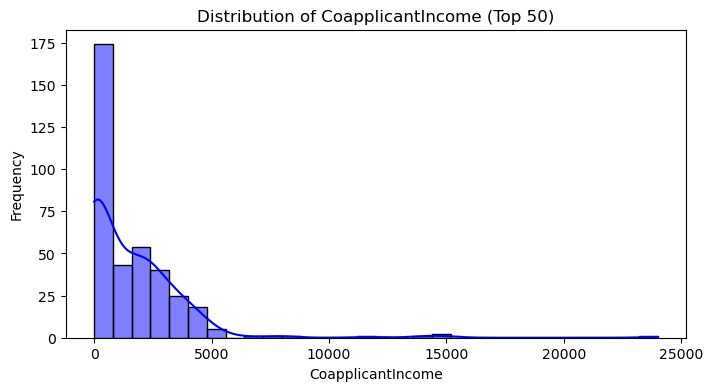

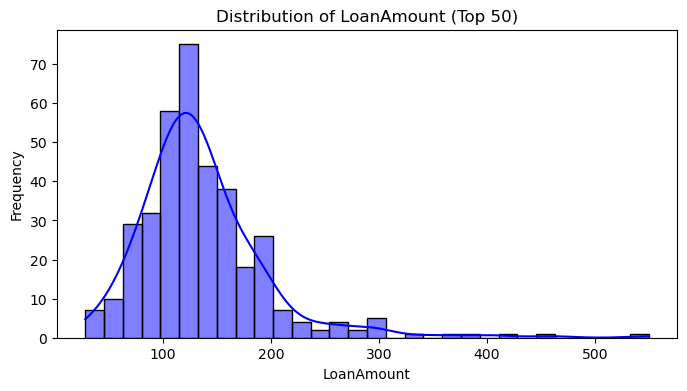

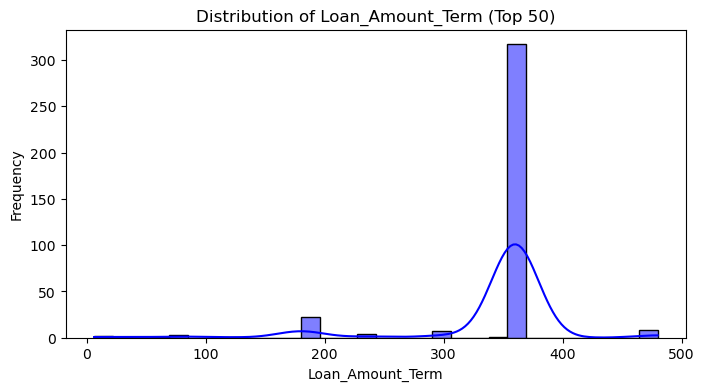

In [10]:
# Histograms for numeric columns
for column in numeric_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {column} (Top 50)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

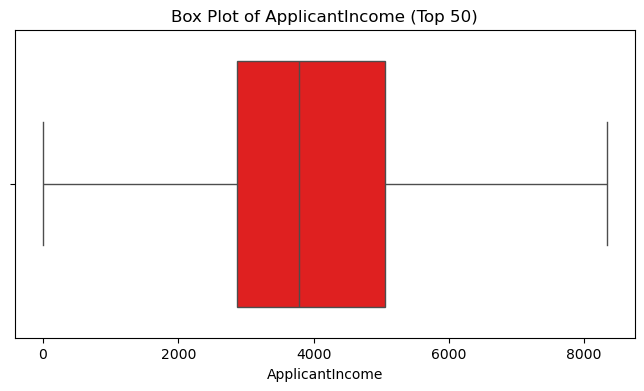

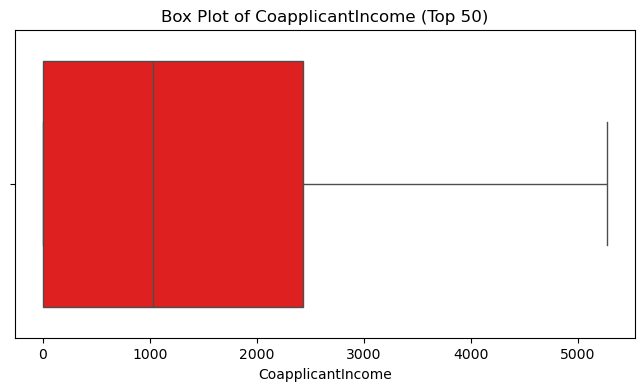

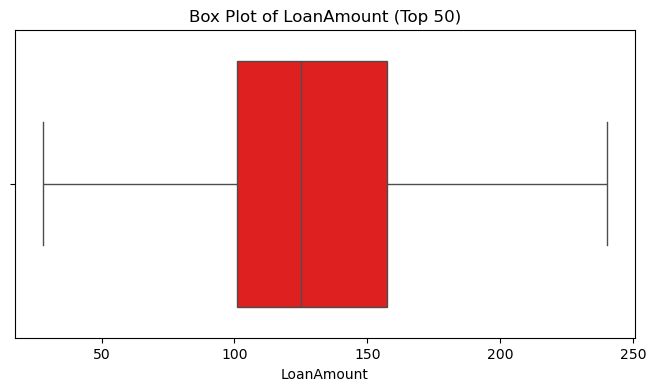

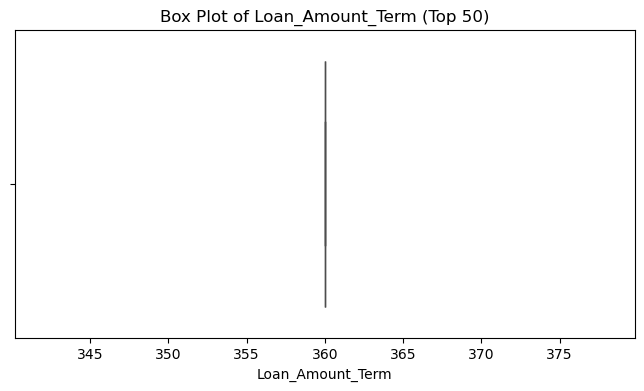

In [11]:
# Box Plots for numeric columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column], color='red', showfliers=False)
    plt.title(f'Box Plot of {column} (Top 50)')
    plt.xlabel(column)
    plt.show()

In [12]:
# Define categorical columns
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

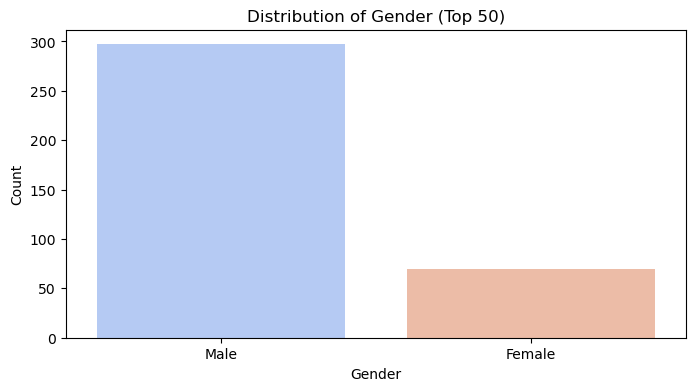

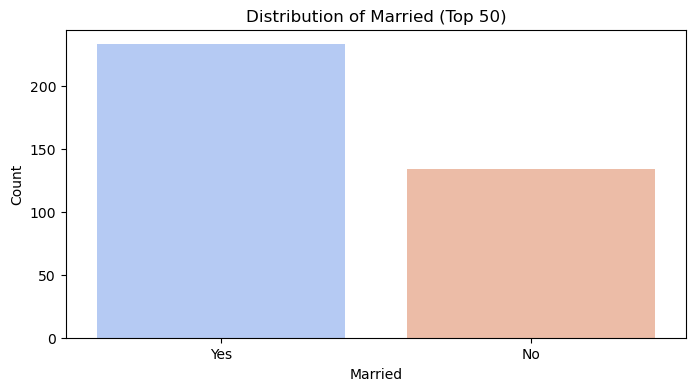

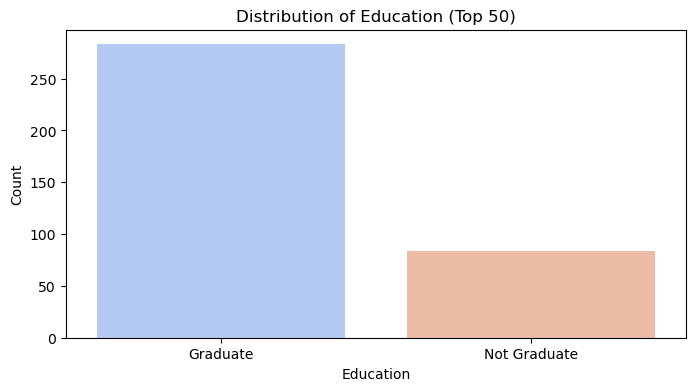

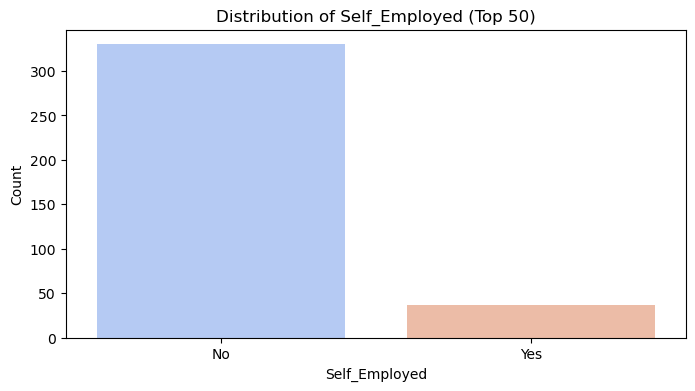

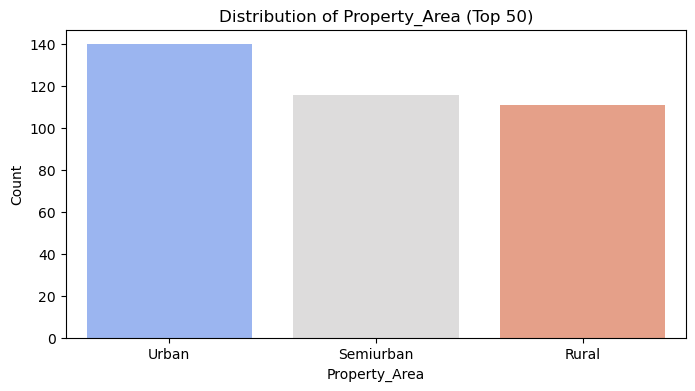

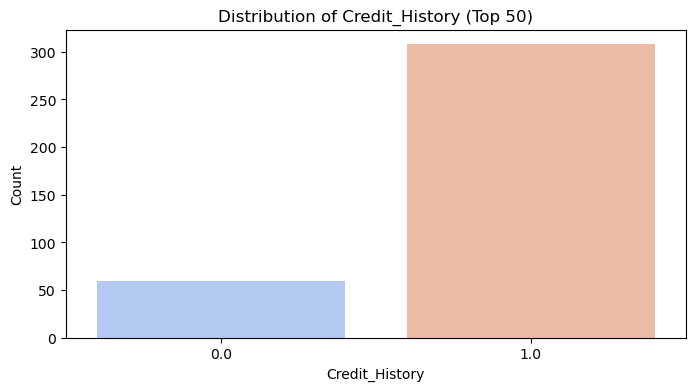

In [13]:
# Bar Charts for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[column], data=df, palette='coolwarm')
    plt.title(f'Distribution of {column} (Top 50)')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

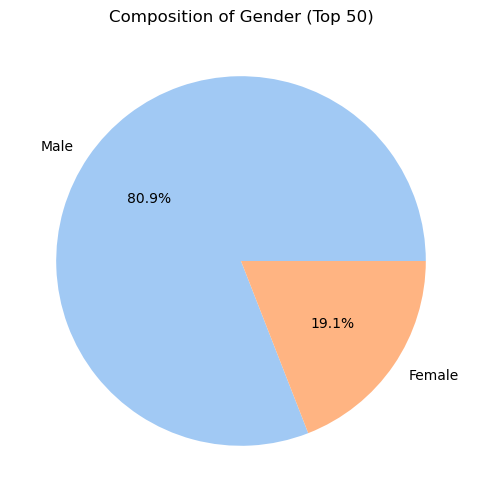

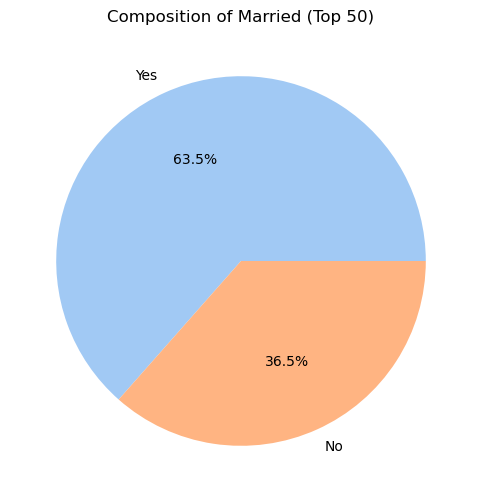

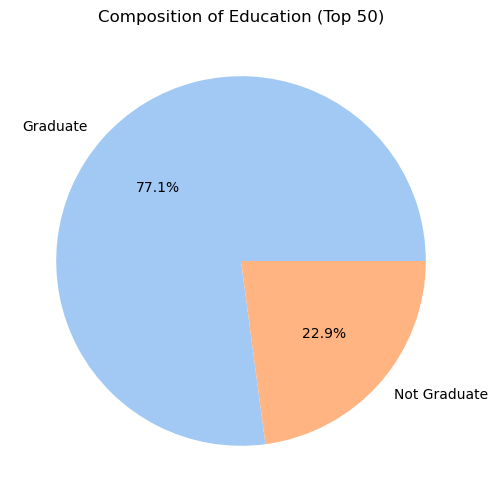

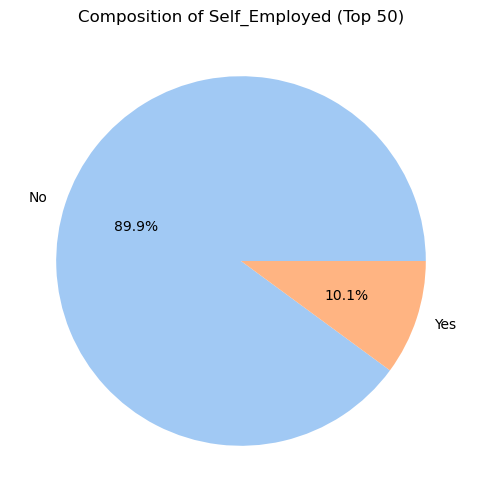

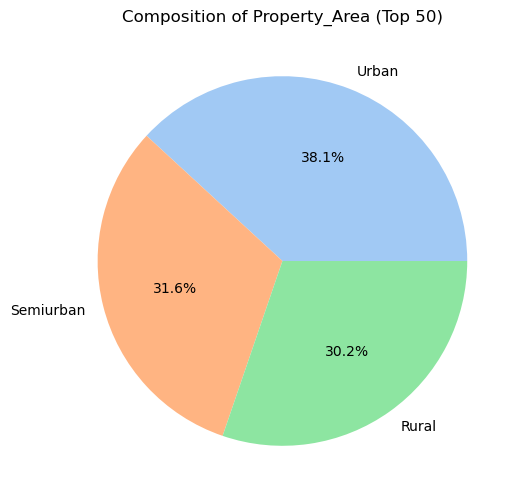

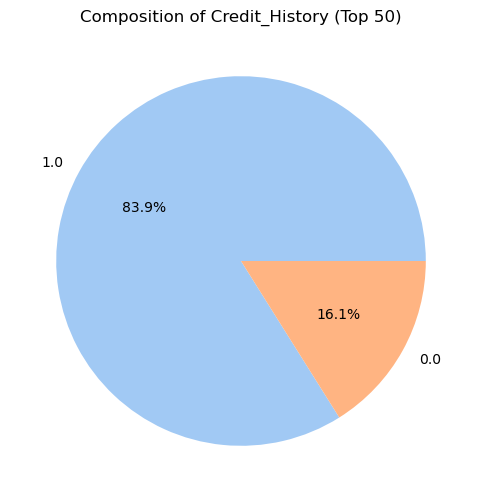

In [14]:
# Pie Charts for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(6, 6))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f'Composition of {column} (Top 50)')
    plt.ylabel('')
    plt.show()

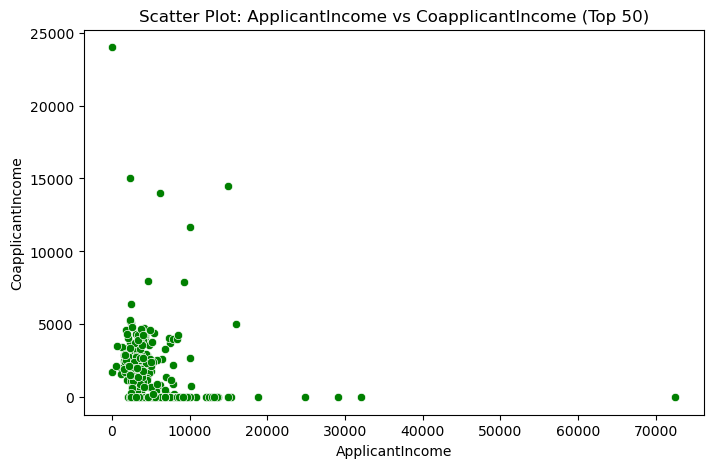

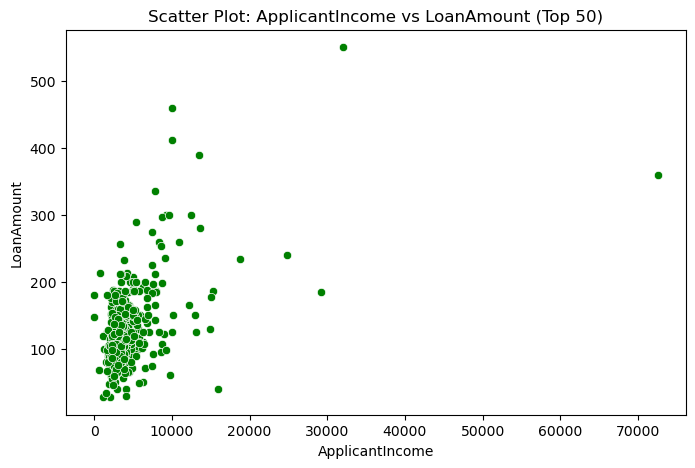

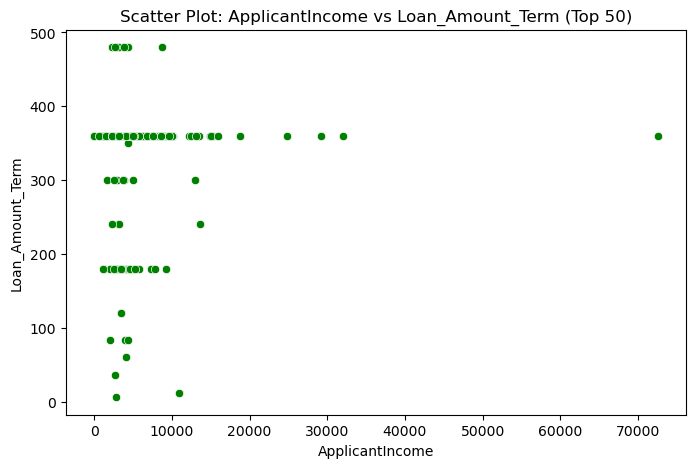

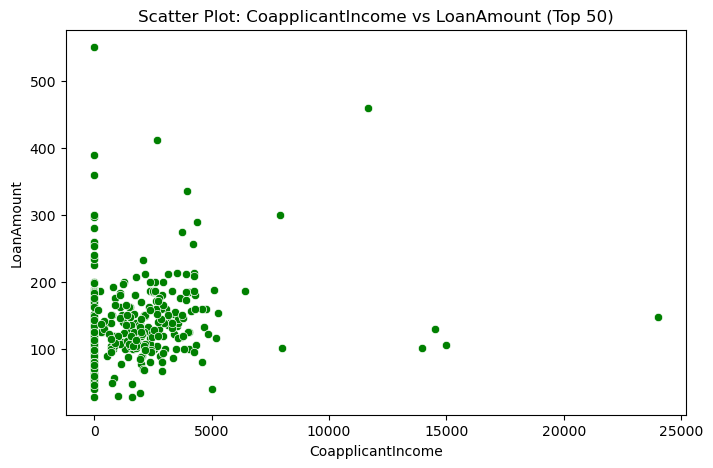

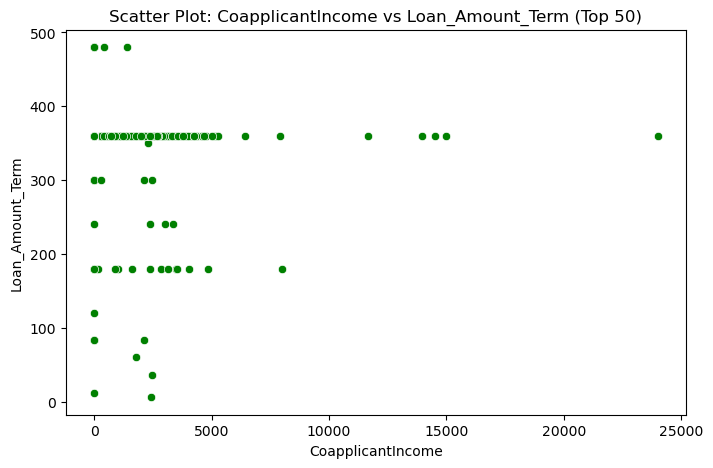

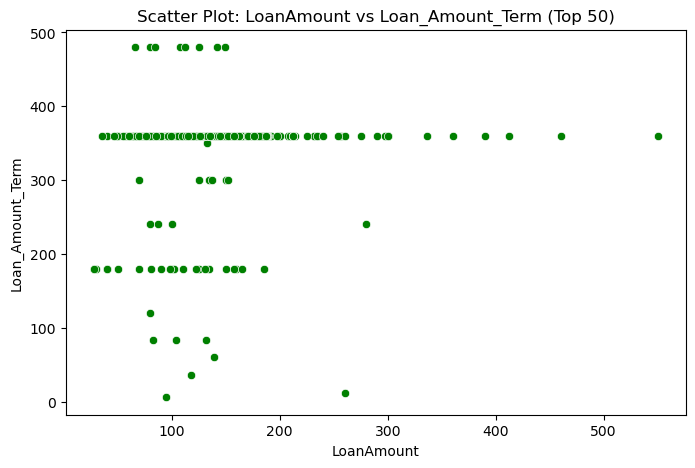

In [15]:
# Bivariate Analysis

# Scatter Plots for numeric variables
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=df[numeric_columns[i]], y=df[numeric_columns[j]], color='green')
        plt.title(f'Scatter Plot: {numeric_columns[i]} vs {numeric_columns[j]} (Top 50)')
        plt.xlabel(numeric_columns[i])
        plt.ylabel(numeric_columns[j])
        plt.show()

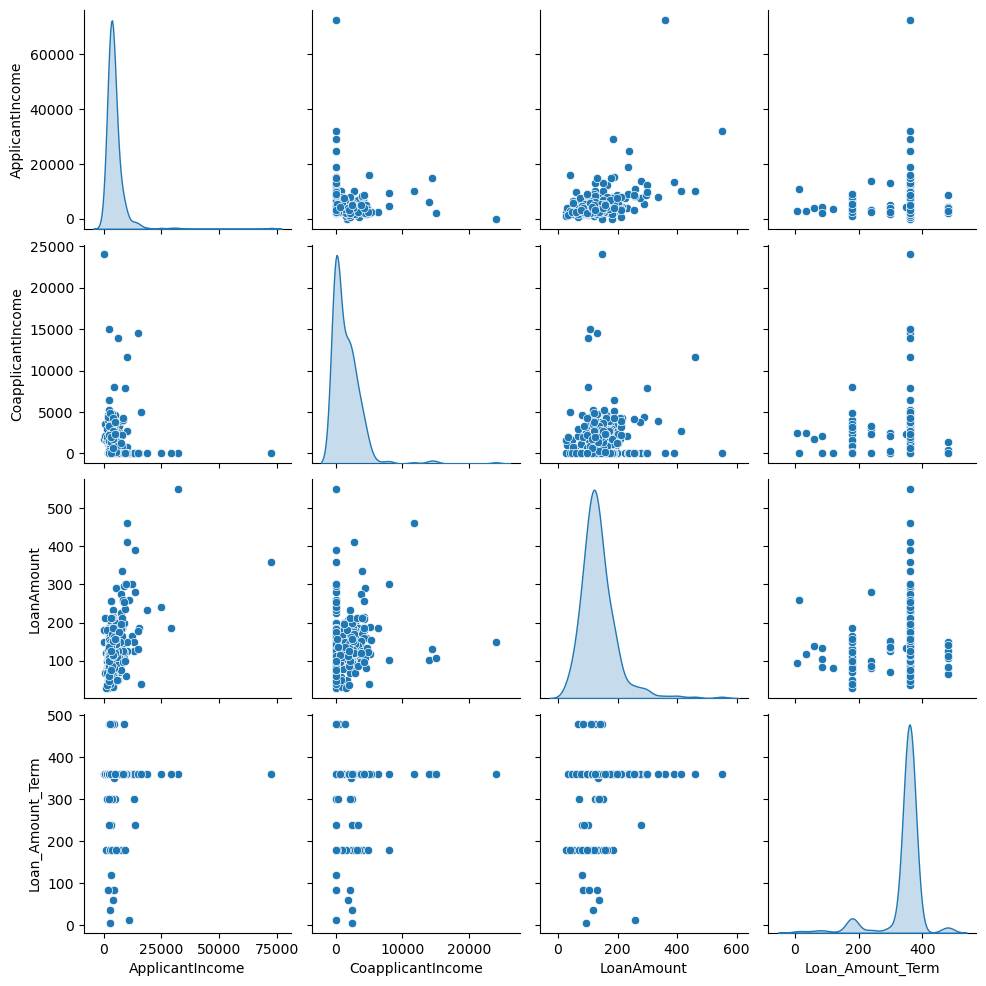

In [16]:
# Pair Plot for numeric variables
sns.pairplot(df[numeric_columns], diag_kind='kde')
plt.show()

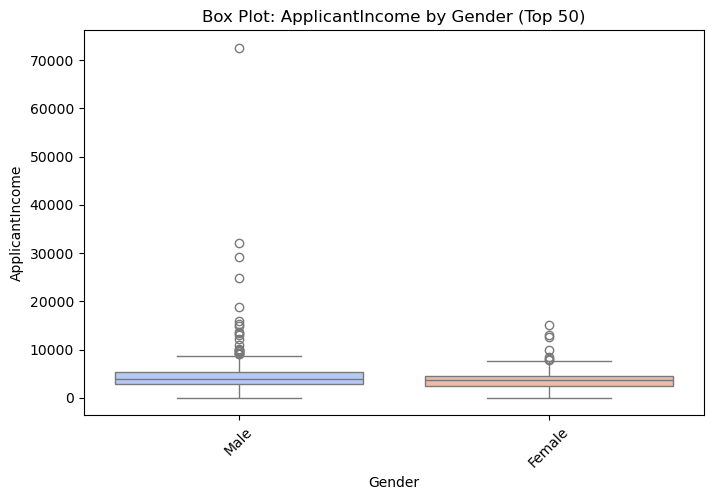

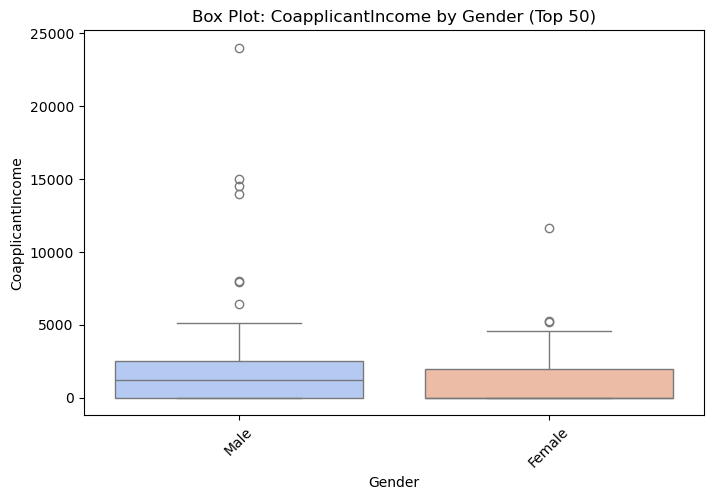

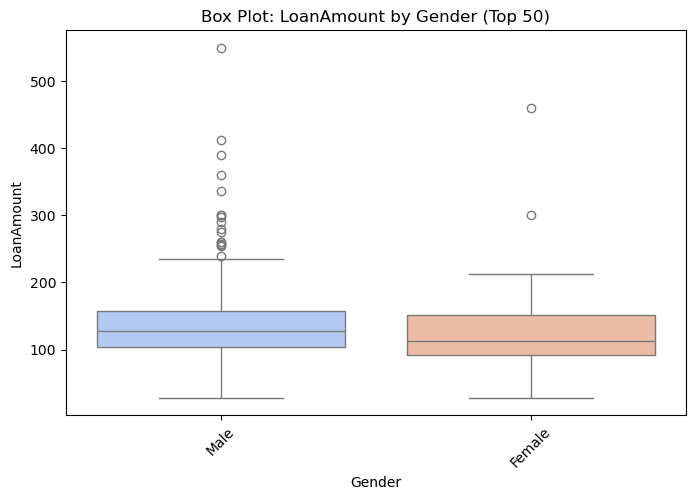

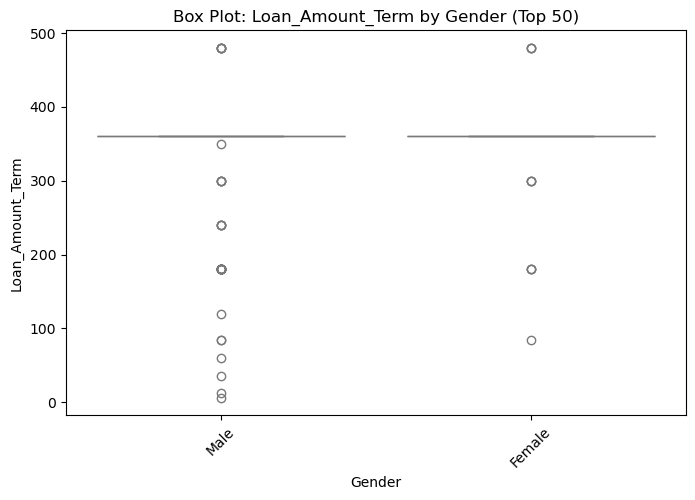

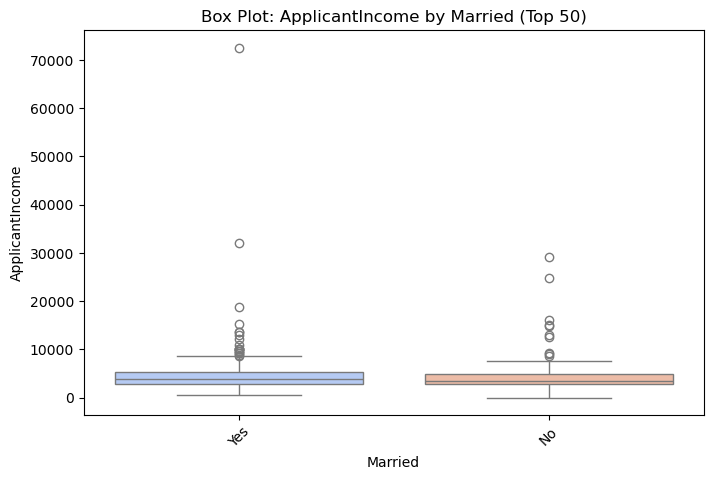

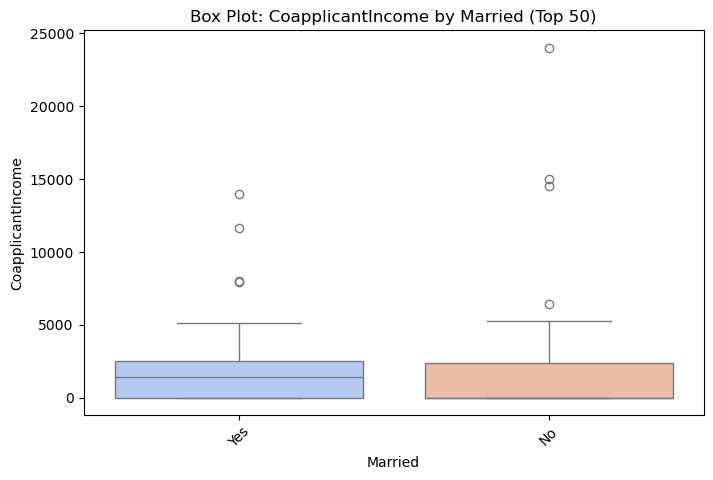

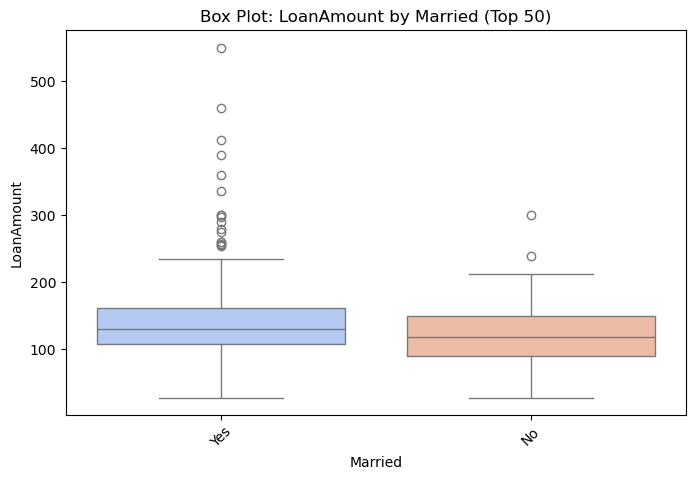

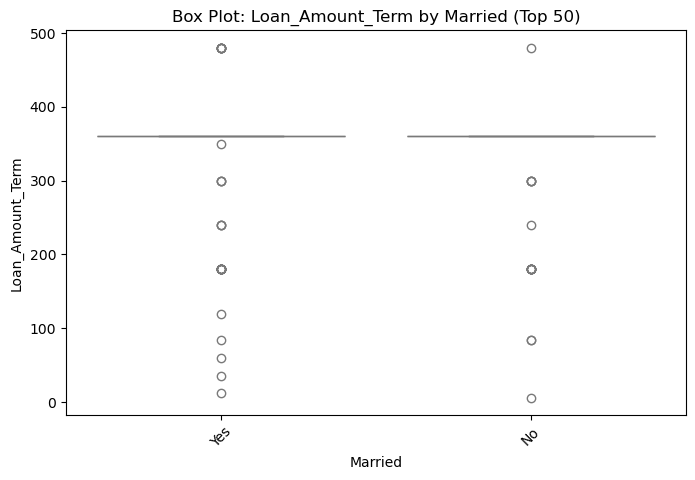

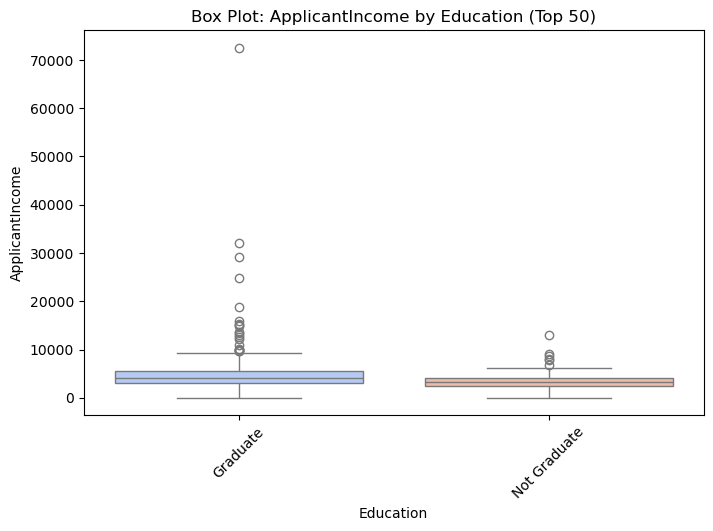

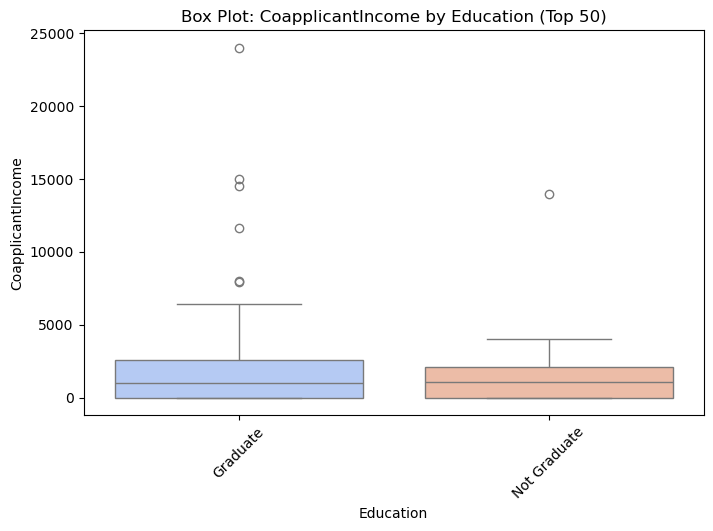

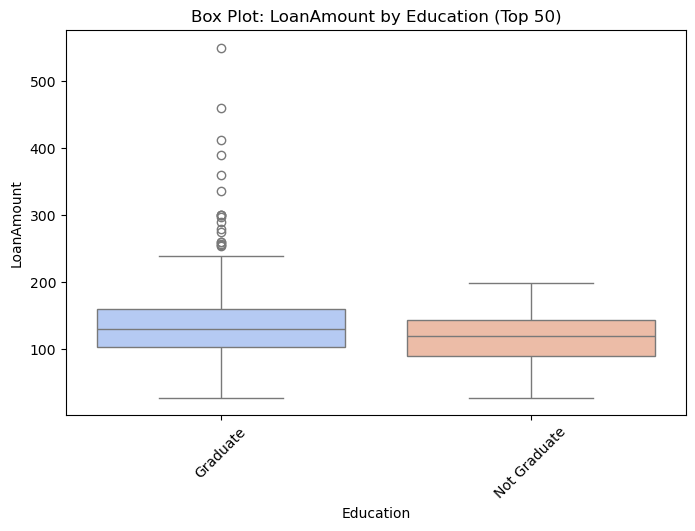

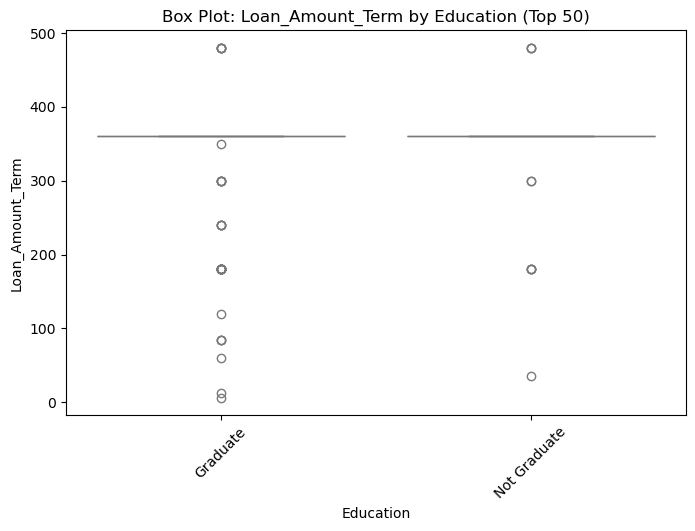

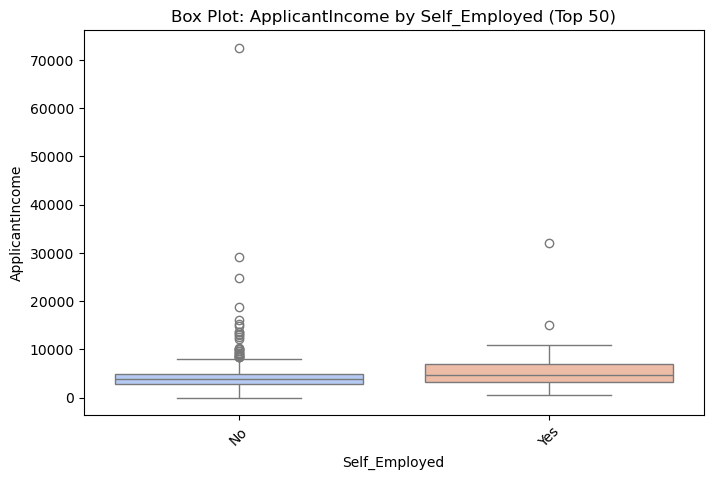

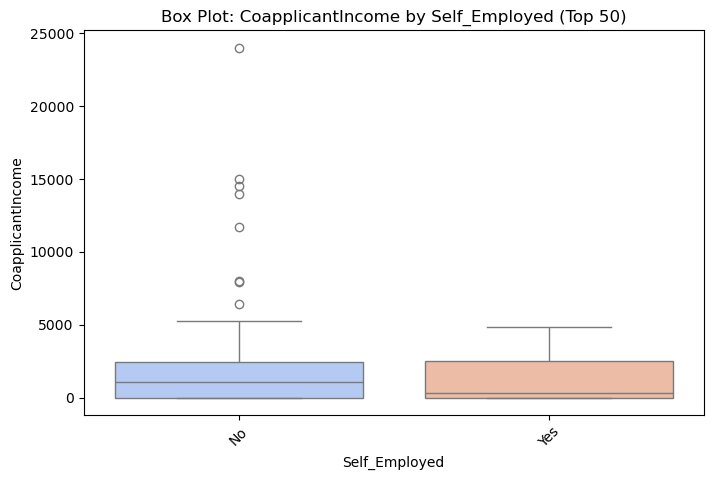

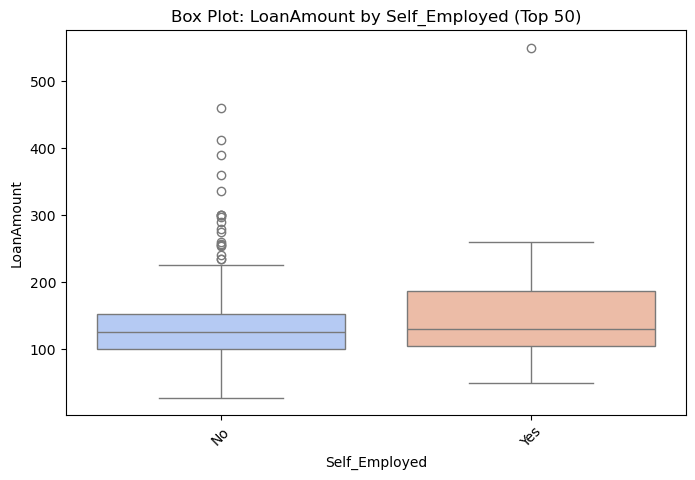

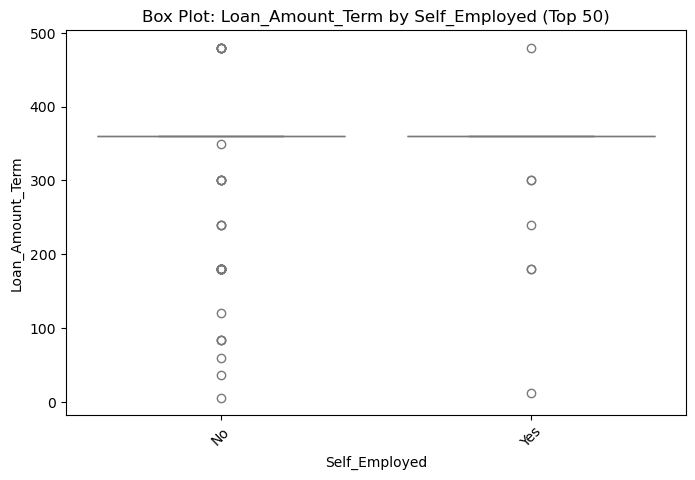

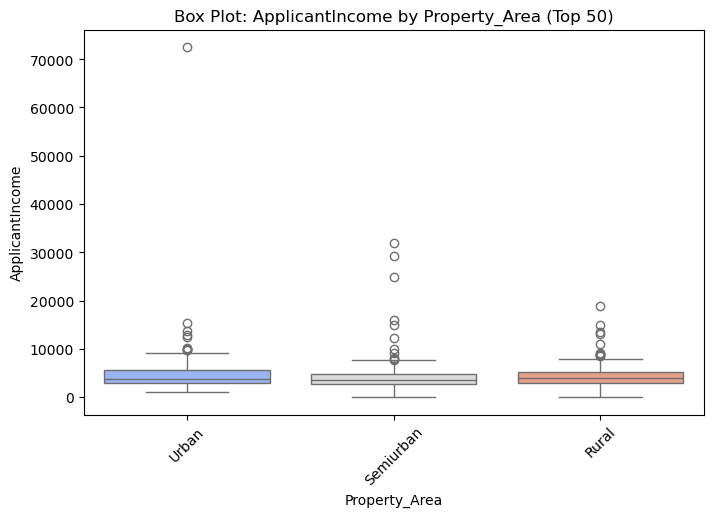

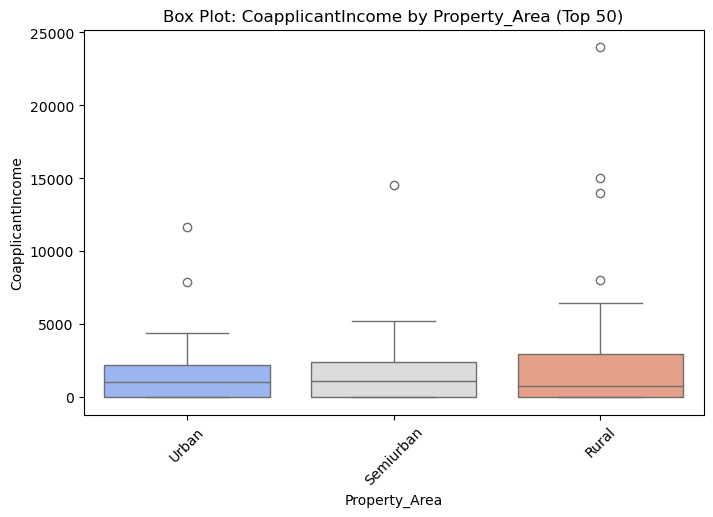

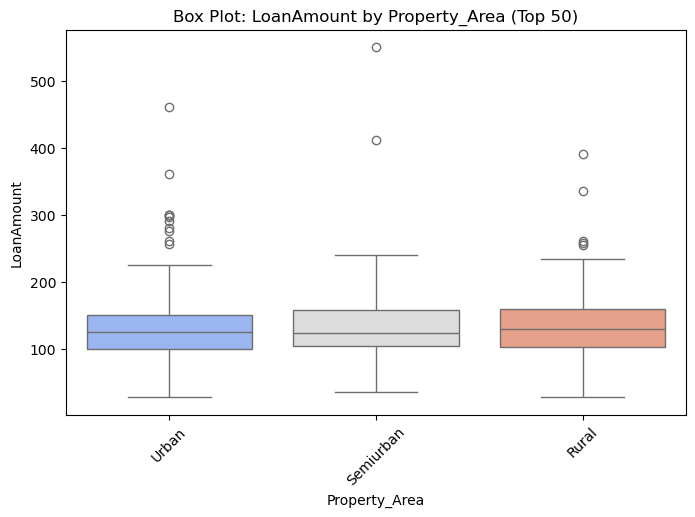

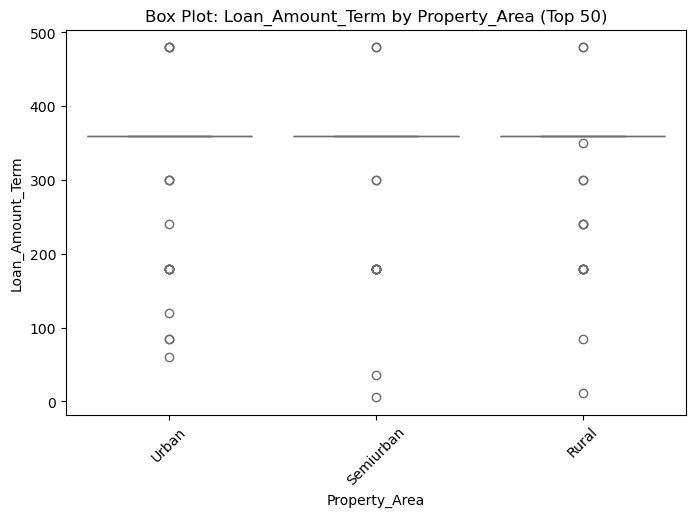

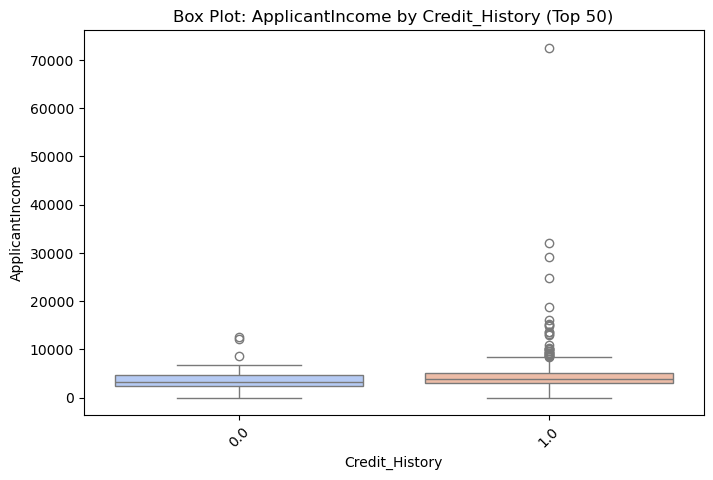

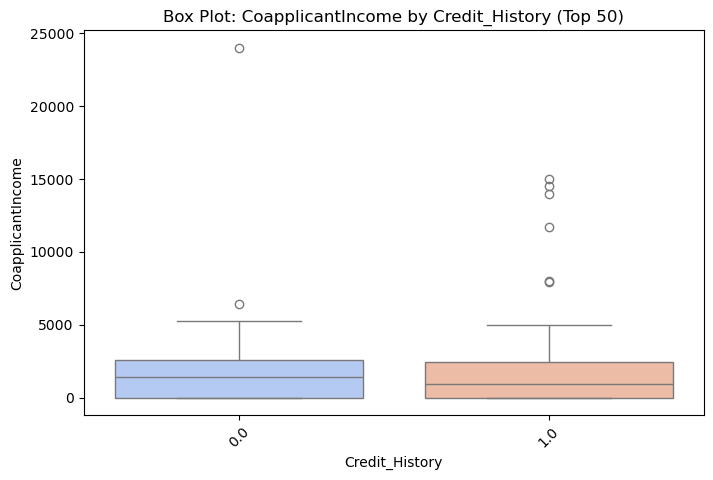

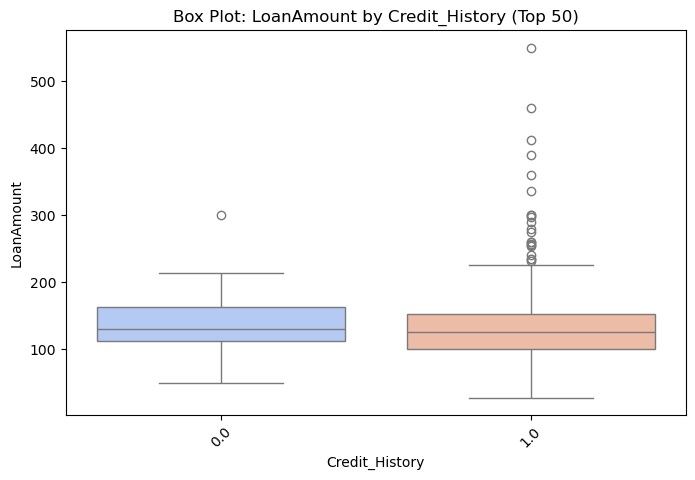

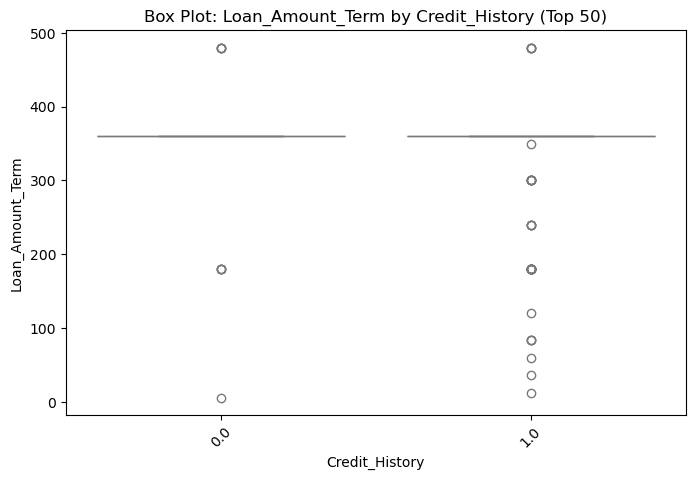

In [17]:
# Box Plots for categorical vs numeric variables
for cat_col in categorical_columns:
    for num_col in numeric_columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[cat_col], y=df[num_col], palette='coolwarm')
        plt.title(f'Box Plot: {num_col} by {cat_col} (Top 50)')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.show()

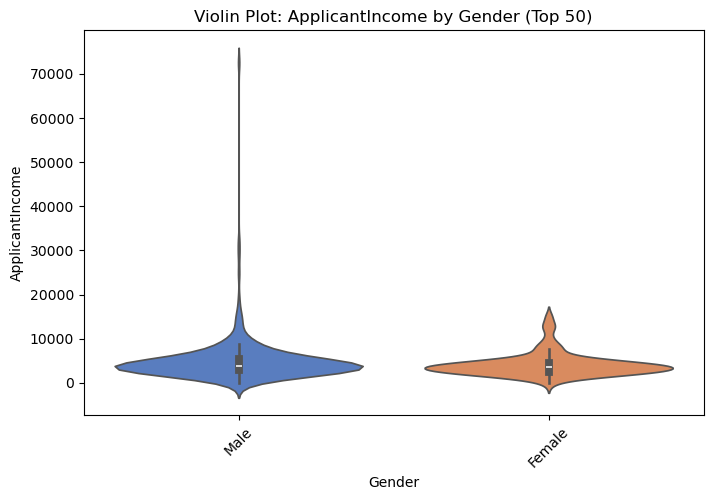

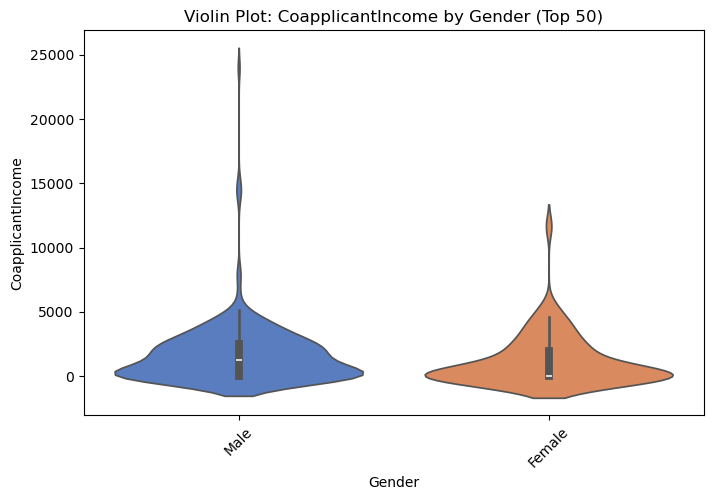

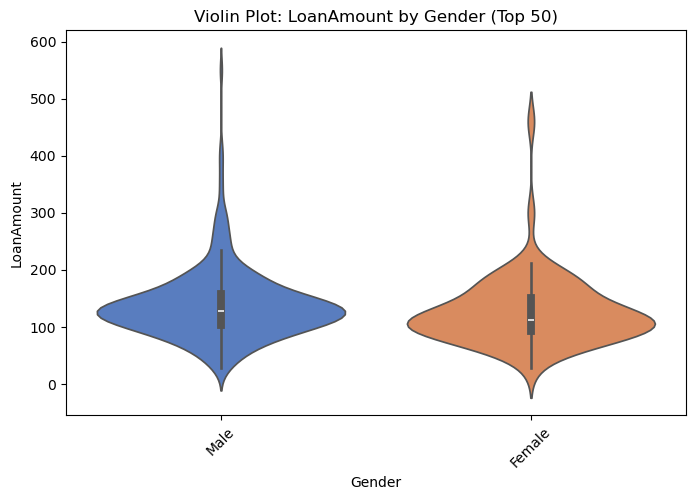

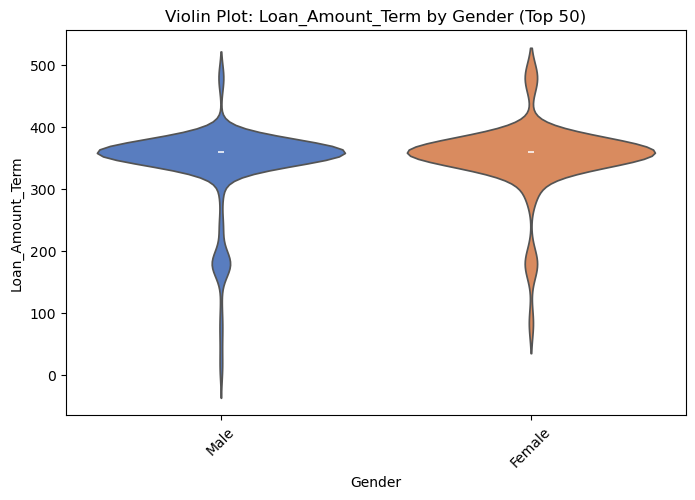

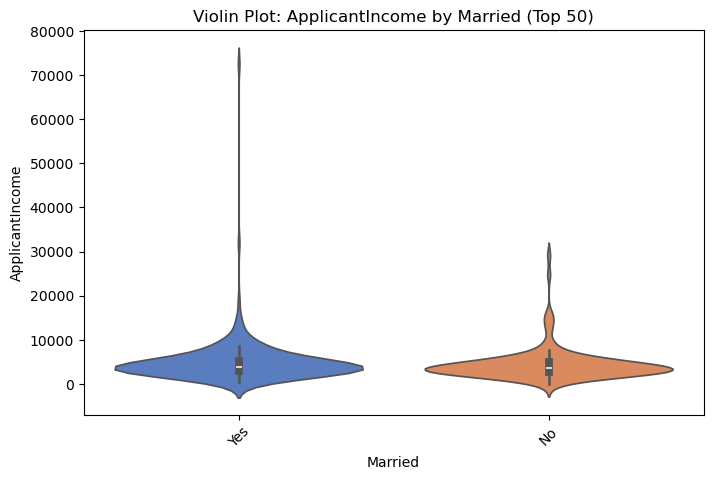

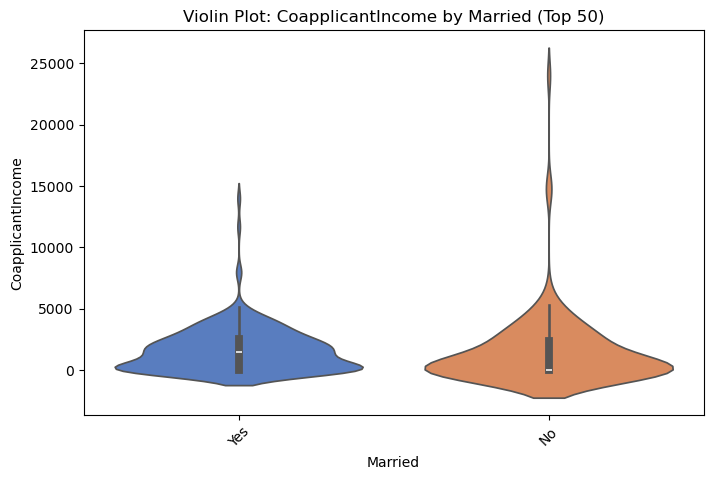

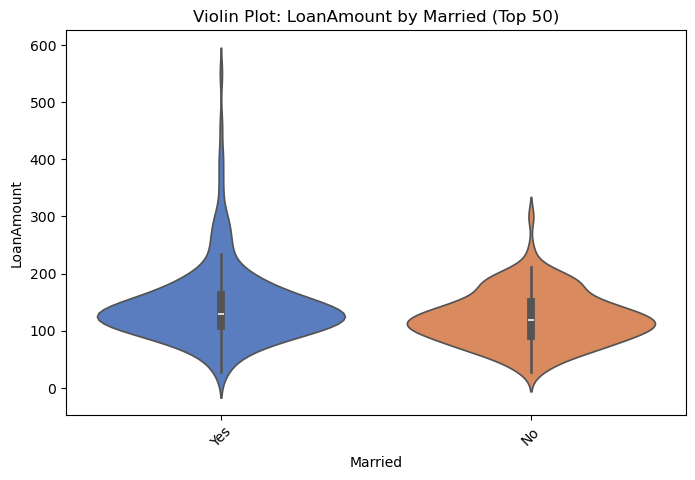

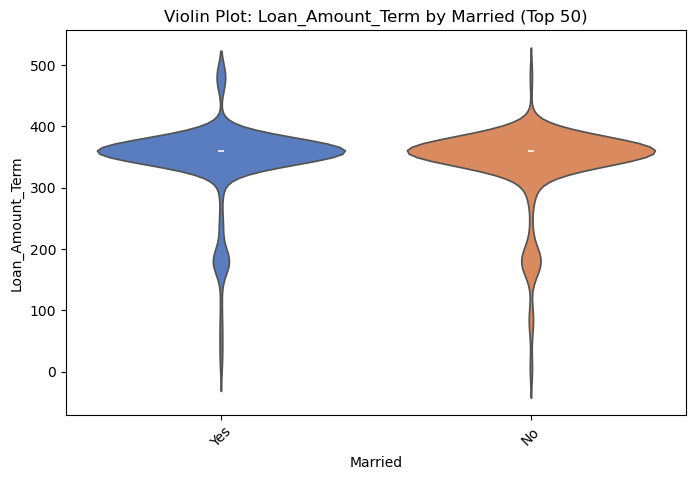

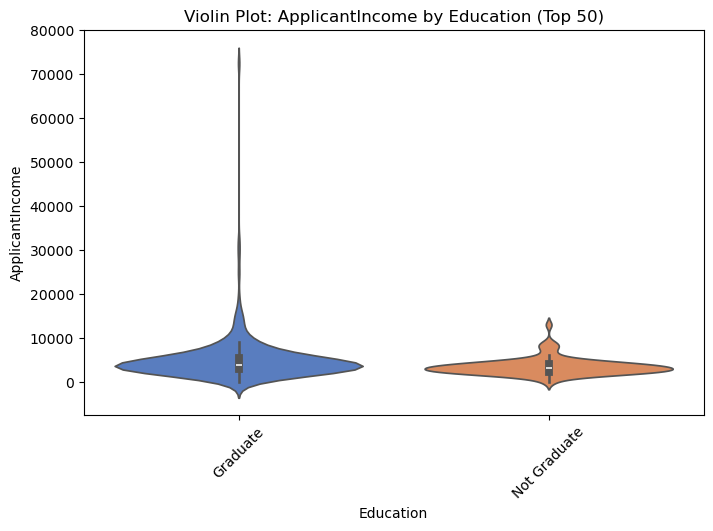

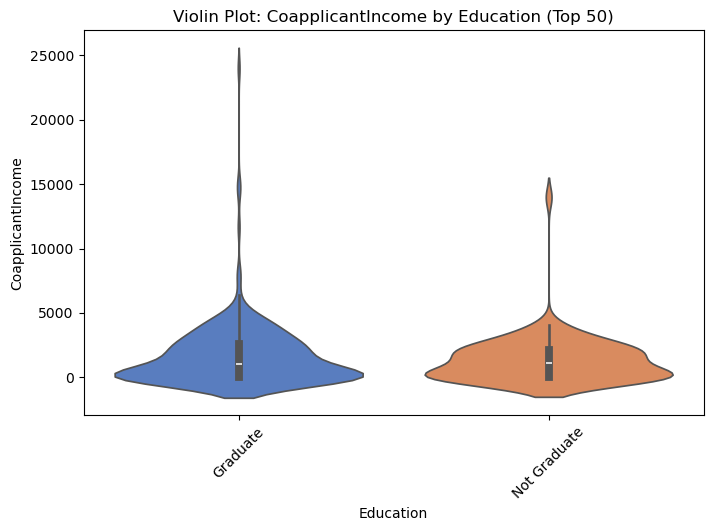

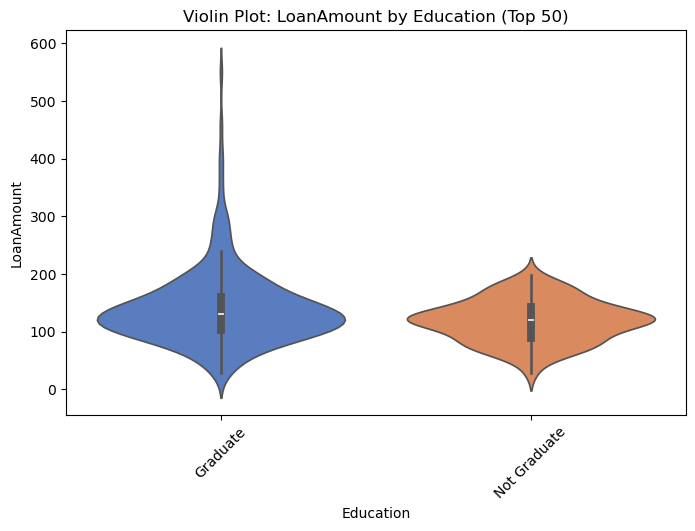

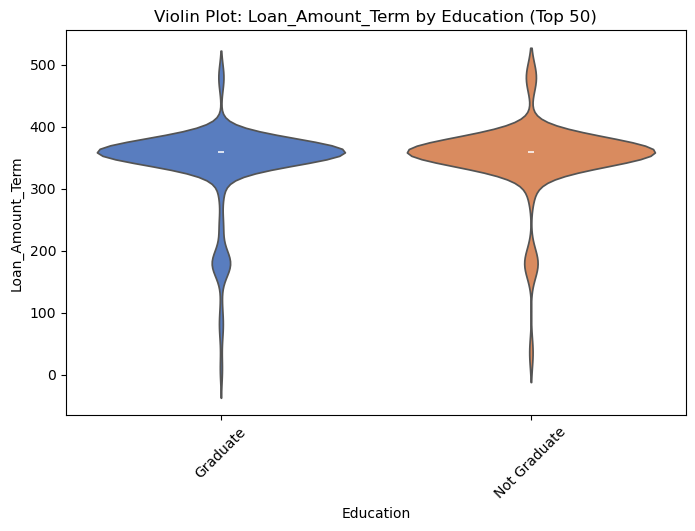

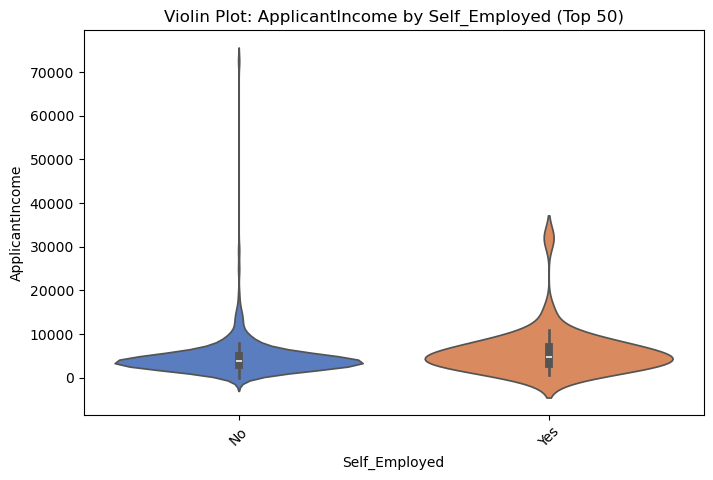

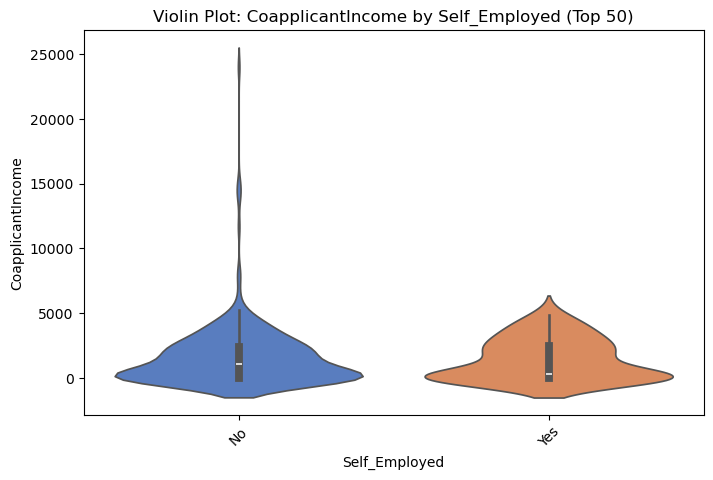

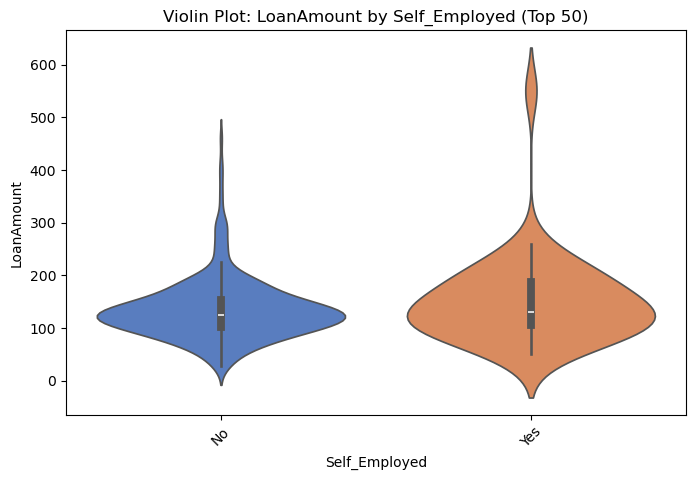

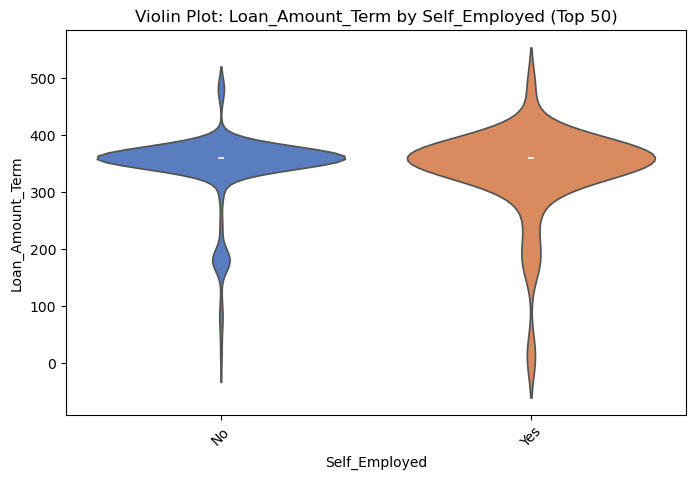

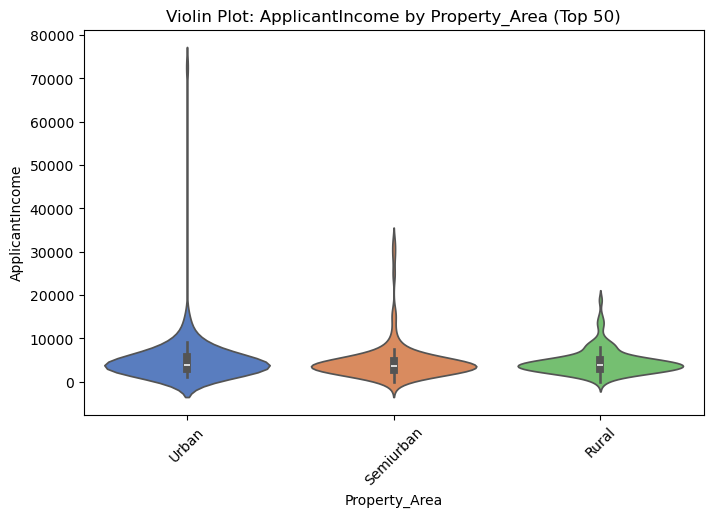

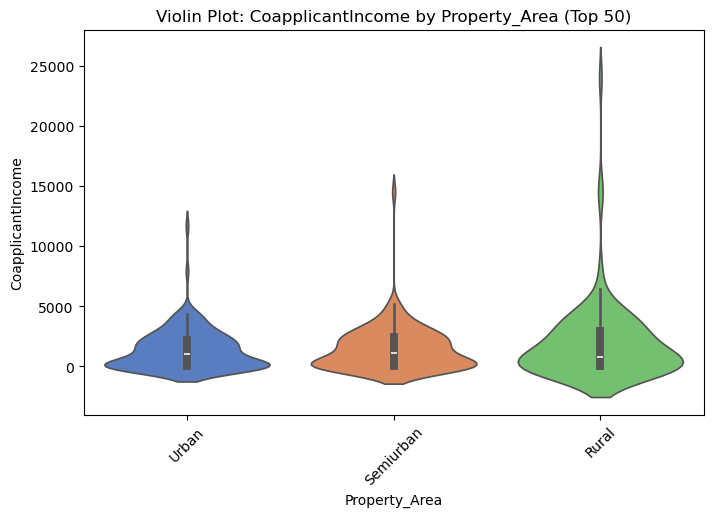

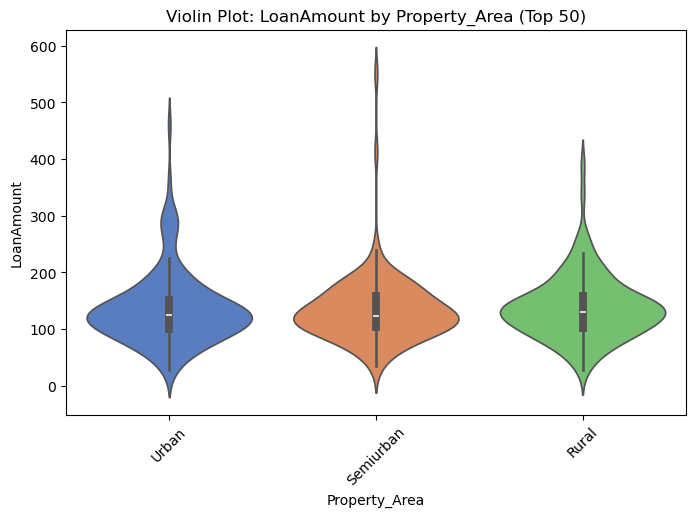

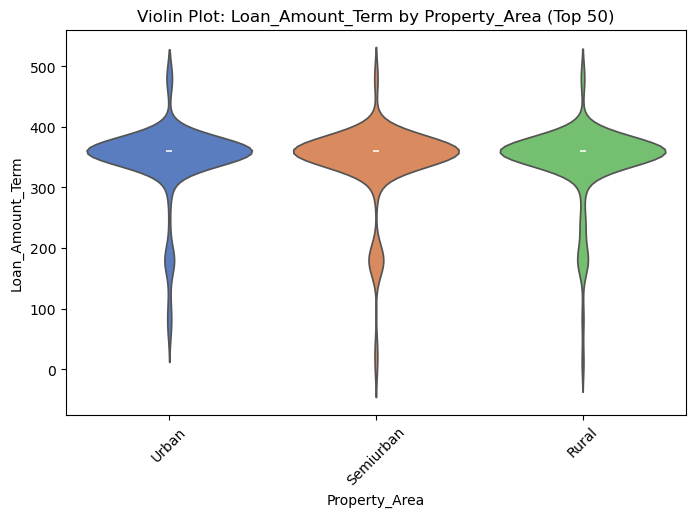

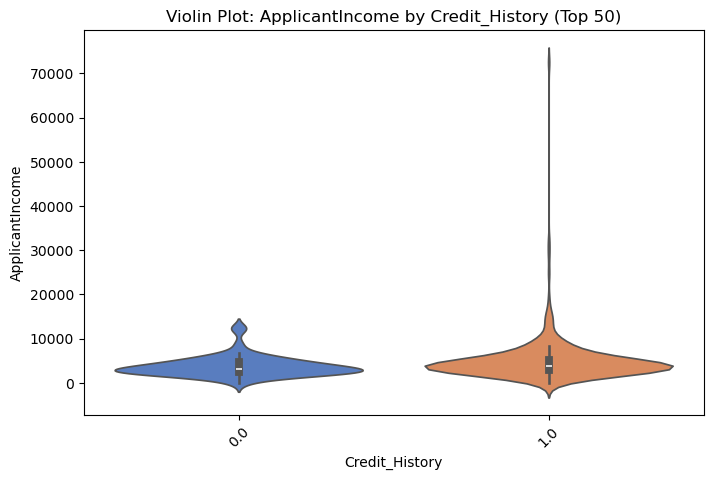

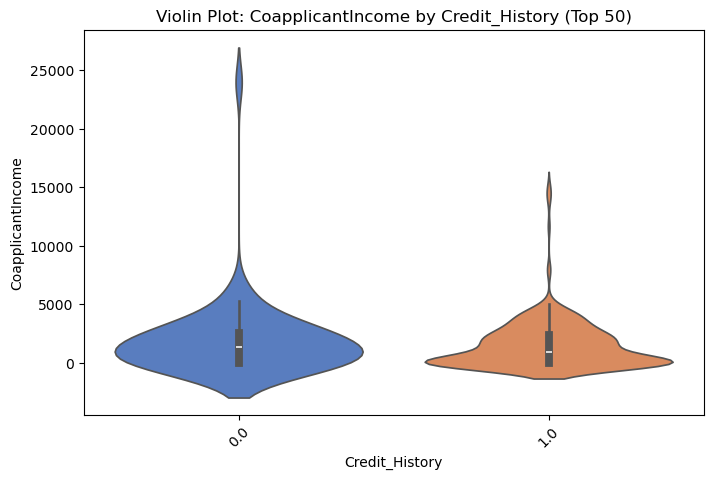

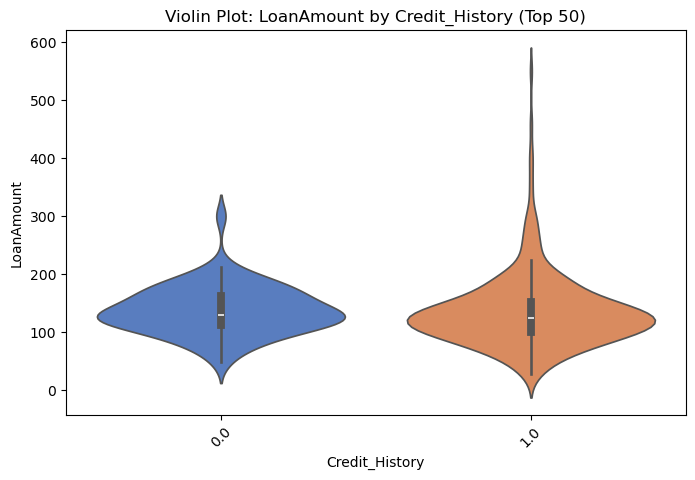

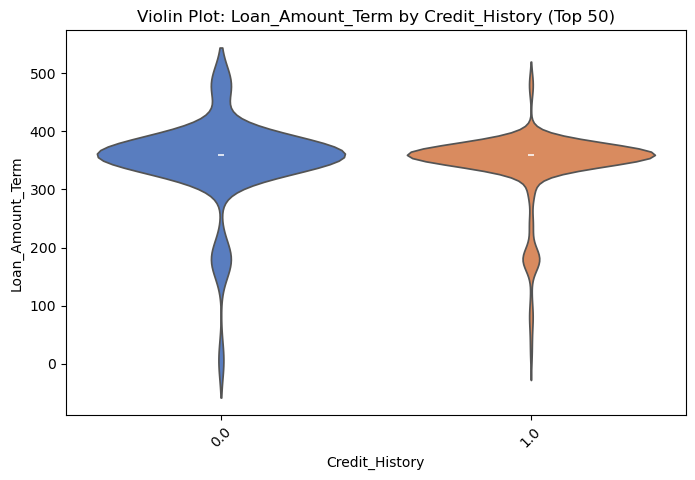

In [18]:
# Violin Plots for categorical vs numeric variables
for cat_col in categorical_columns:
    for num_col in numeric_columns:
        plt.figure(figsize=(8, 5))
        sns.violinplot(x=df[cat_col], y=df[num_col], palette='muted')
        plt.title(f'Violin Plot: {num_col} by {cat_col} (Top 50)')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.show()

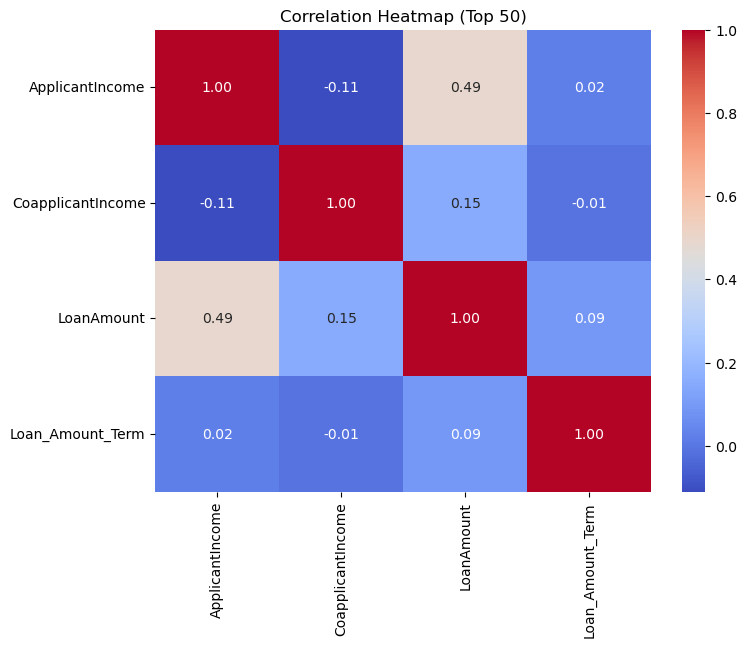

In [19]:
# Multivariate Analysis

# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Top 50)')
plt.show()

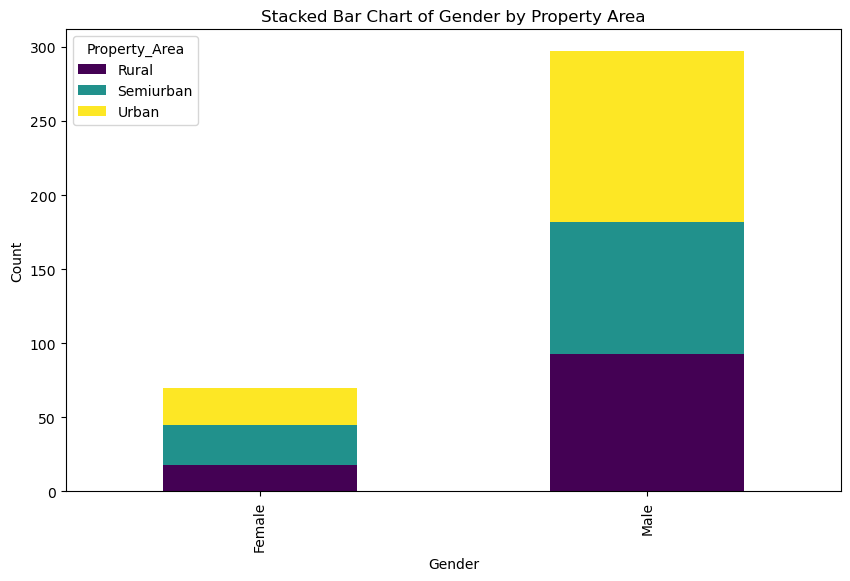

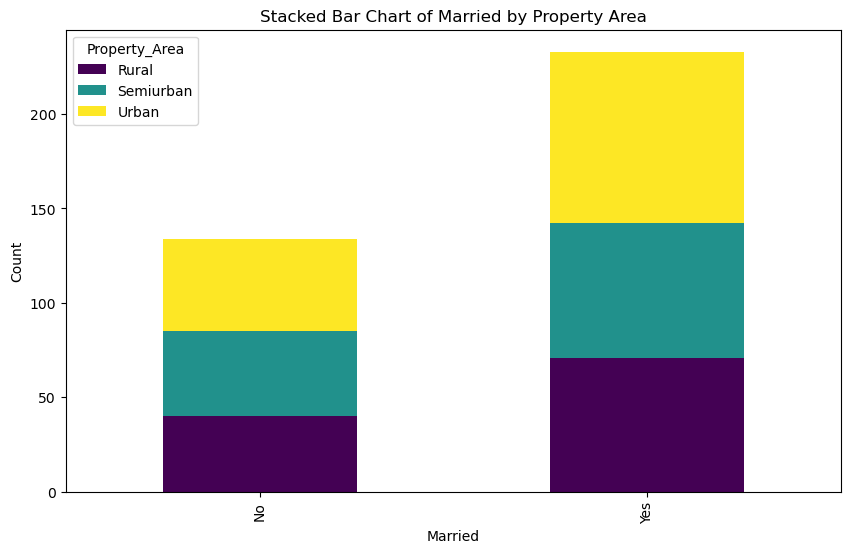

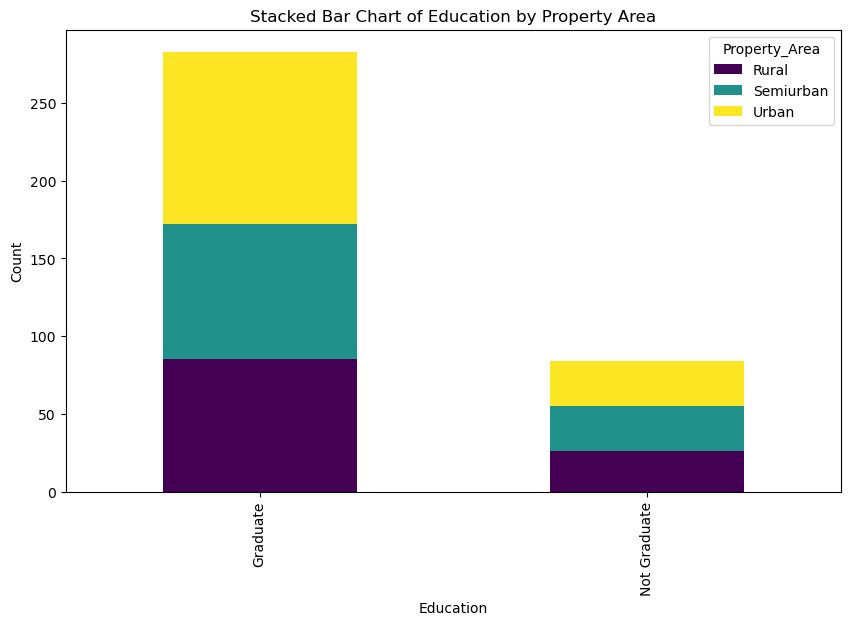

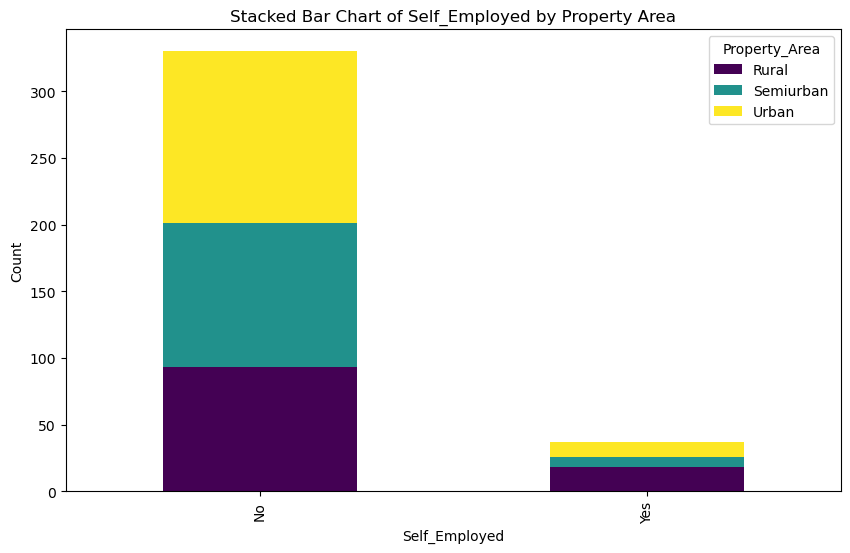

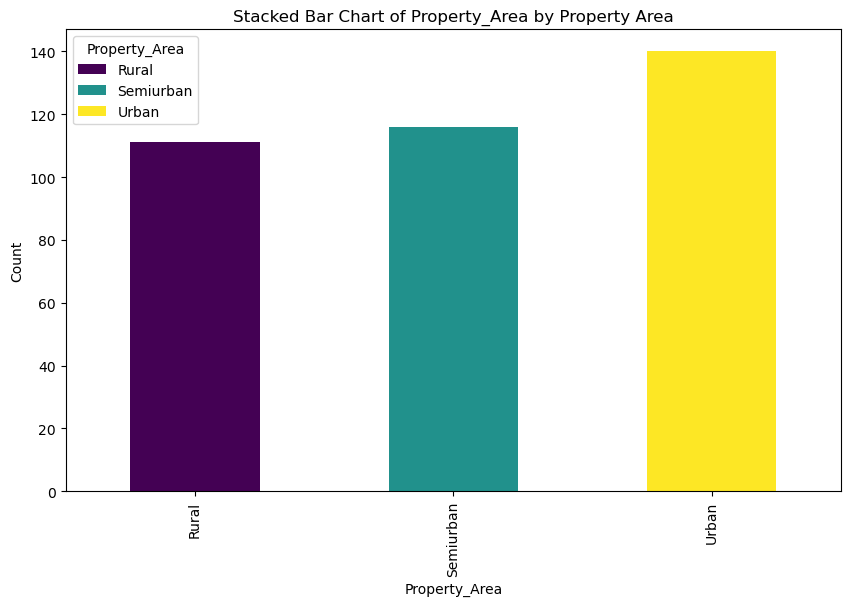

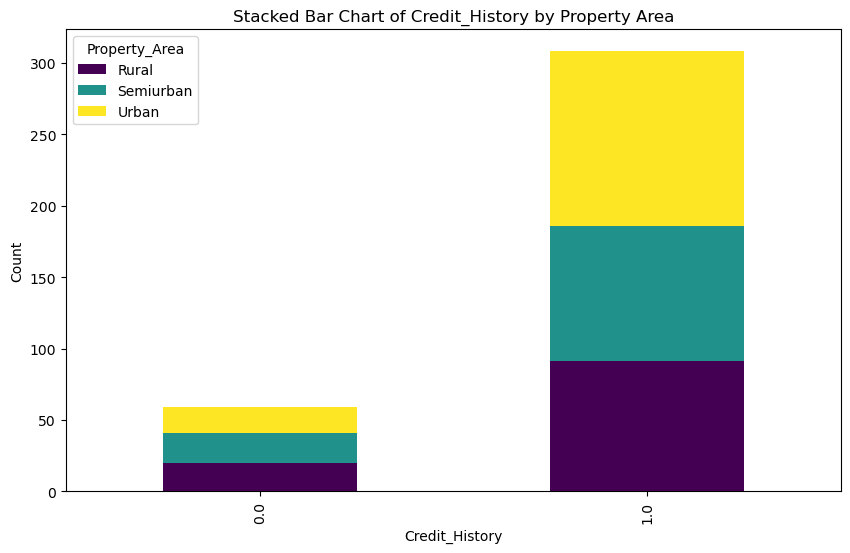

In [20]:
for col in categorical_columns:
    cross_tab = pd.crosstab(df[col], df['Property_Area'])
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'Stacked Bar Chart of {col} by Property Area')
    plt.ylabel('Count')
    plt.show()